## Problem	1 [Testing	Faith]
Download	the	“old	 faithful”	data set	from	blackboard.	This	contains samples	of	a	2-D	random	variable:	
the	 first	dimension	is	the	duration	of	the	old	 faithful	geyser	eruptions.	The	second	is	the	waiting	 time	
between	eruptions. Generate	a	2-D	scatter	plot	of	the	data.	Run	a	k-means	clustering	routine	on	the	data	
for	k=2.	Show	the	two	clusters	in	a	scatterplot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_table('data/old-faithful.txt')
df.head()

,eruption,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


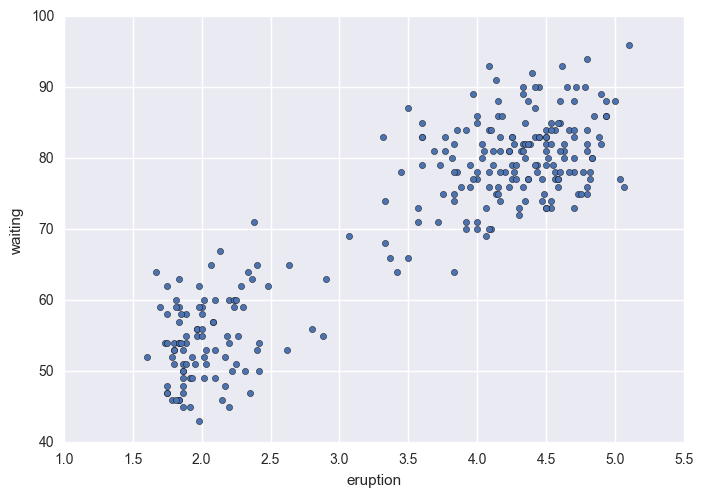

In [3]:
df.plot.scatter('eruption', 'waiting')

In [4]:
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(df)

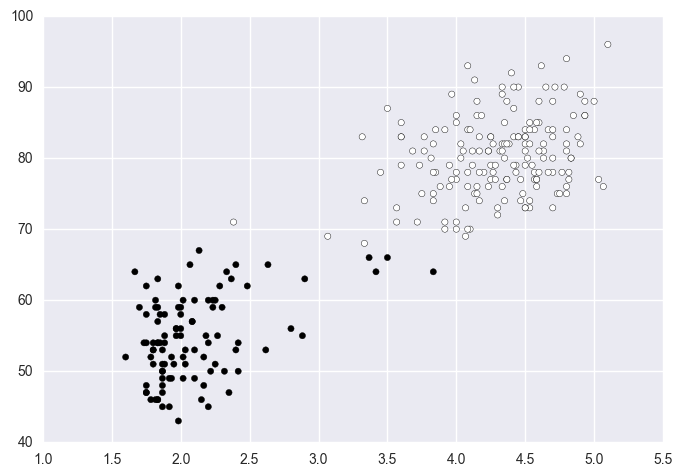

In [5]:
plt.scatter(df[[0]], df[[1]], c=y_pred)

#### k-means finds the two well separated clusters in this case

## Problem	2	[Generating	Mixed	Samples]
Implement	a	random	number	generator	for	a	random	variable with	the	following	mixture	distribution:
$f(x) = 0.4N(-1,1)  + 0.6N(1,1)$

Generate	N=1000	samples	and	histogram	them.	Try	out	a	k-means	clustering	routine	(k=2)	on	the	data.

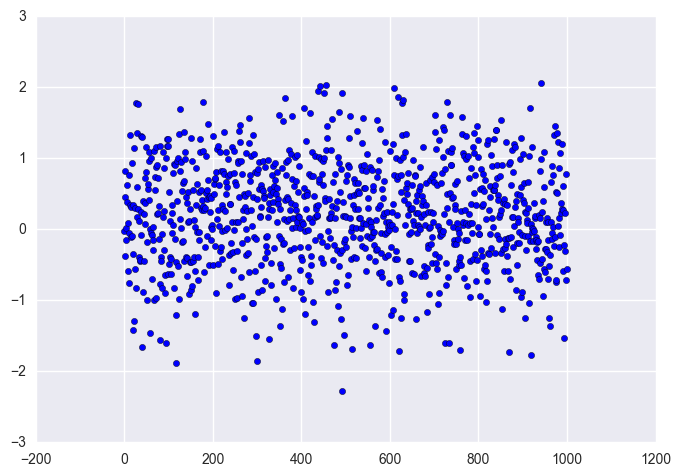

In [6]:
def mixture_model(mu1,mu2,s1,s2,alpha):
    return alpha*np.random.normal(mu1, s1, 1000) + (1-alpha)*np.random.normal(mu2, s2, 1000)


mixture_samples = mixture_model(-1,1,1,1,0.4)
plt.scatter(range(1000), mixture_samples)

(array([   1.,    2.,    7.,   12.,   13.,   20.,   33.,   56.,   83.,
          90.,  125.,  124.,  110.,   88.,   83.,   70.,   44.,   19.,
          11.,    9.]),
 array([-2.27885441, -2.06209541, -1.84533641, -1.62857741, -1.41181841,
        -1.19505942, -0.97830042, -0.76154142, -0.54478242, -0.32802342,
        -0.11126442,  0.10549458,  0.32225358,  0.53901258,  0.75577158,
         0.97253058,  1.18928957,  1.40604857,  1.62280757,  1.83956657,
         2.05632557]),
 <a list of 20 Patch objects>)

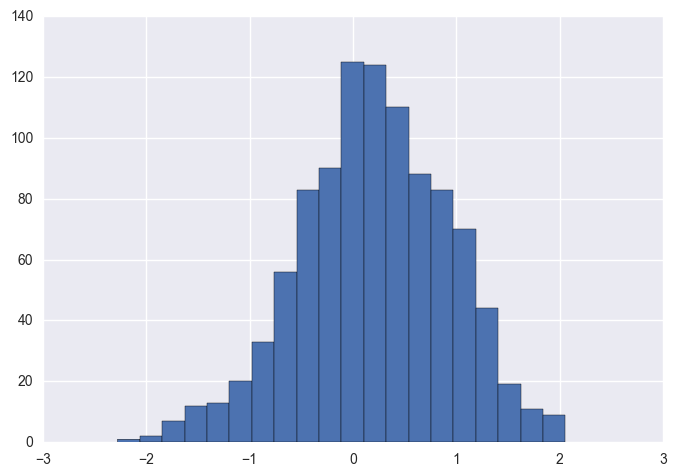

In [7]:
plt.hist(mixture_samples, bins=20)

In [8]:
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(mixture_samples.reshape(-1,1))

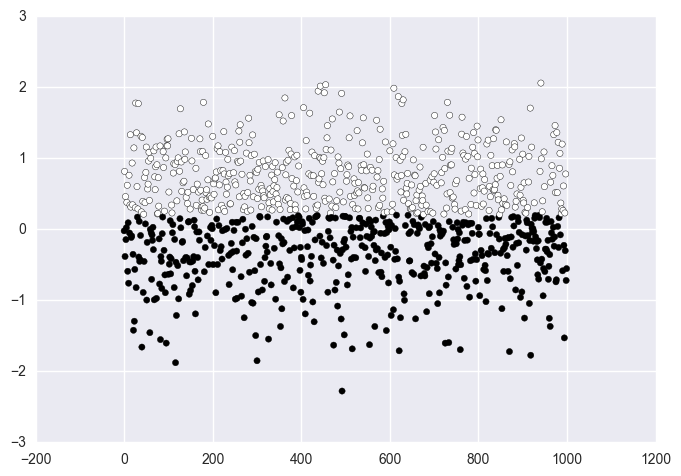

In [9]:
plt.scatter(range(1000), mixture_samples, c=y_pred)

#### The clusters seem to have been separated as expected, based on the mean of the underlying Gaussian.